# <span style="color:#0b486b">SIT307 - Data Mining and Machine Learning</span>


## <span style="color:#0b486b">Data Cleaning and Preparation</span>


**The purpose of this session is:**

1. learn basic data cleaning skills

**Instructions** 

1. After you download this notebook, save it as another copy and rename it to `"[yourstudentID]_Week_4_Data_cleaning.ipynb"`
2. fill in the code cells indicated with your own solution. You can discuss approaches with other students but must only submit your own original solution. 

In [2]:
from scipy import stats

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import math

In [3]:
#show base data from vehicles.csv file
df = pd.read_csv('../Data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [4]:
#get number of rows and columns in dataframe
r,c = df.shape

#create dictionary how many rows in each column have zero values
missing_rows=df.apply(lambda x: round((r-x.count())/r,3), axis=0).to_dict()

#create an array to automatically drop columns
drop_columns=[]
filter_percentage = 0.4

for key,value in missing_rows.items():
    if value >= filter_percentage:
        drop_columns.append(key)

drop_columns

['condition', 'cylinders', 'vin', 'size', 'county']

In [5]:
#add more columns manually to drop based on viewing data, such as url which holds no real value in terms of data analysis
drop_columns.extend(['url','region_url', 'title_status', 'image_url', 'lat','long', 'description'])
drop_columns

['condition',
 'cylinders',
 'vin',
 'size',
 'county',
 'url',
 'region_url',
 'title_status',
 'image_url',
 'lat',
 'long',
 'description']

In [64]:
#drop columns from data frame
dropped_df = df.drop(columns=drop_columns)

#drop rows based on null values
drop_threshold = 2
dropped_df = dropped_df.dropna()
dropped_df

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
1,7088745301,greensboro,0,2011.0,bmw,335,gas,115120.0,automatic,rwd,convertible,blue,nc
3,7088743681,greensboro,3995,2004.0,honda,element,gas,212526.0,automatic,fwd,SUV,orange,nc
6,7088741418,greensboro,10995,2014.0,chevrolet,traverse,gas,112383.0,automatic,fwd,SUV,black,nc
8,7088737004,greensboro,3995,2007.0,toyota,solara,gas,185123.0,automatic,fwd,convertible,black,nc
10,7088732376,greensboro,7995,2008.0,nissan,frontier,gas,162214.0,automatic,fwd,pickup,red,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539736,7088767324,greensboro,6695,2012.0,volvo,s60,gas,121898.0,automatic,fwd,sedan,silver,nc
539744,7076307686,syracuse,6300,2014.0,nissan,altima,gas,85000.0,automatic,fwd,sedan,grey,ny
539752,7093462901,denver,5295,2006.0,audi,a4 2.0t avant quattro,gas,150000.0,automatic,4wd,wagon,custom,co
539755,7088752165,greensboro,13995,2016.0,nissan,frontier,gas,97545.0,automatic,4wd,pickup,silver,nc


In [65]:
#review of manufacturer names to ensure they are similar throughout
man = dropped_df['manufacturer'].unique()
man.sort()
print(man)
print("%s \n" % (len(man)))

mod = dropped_df['model'].unique()
mod.sort()
print(mod)
print("%s \n" % (len(mod)))


['acura' 'alfa-romeo' 'aston-martin' 'audi' 'bmw' 'buick' 'cadillac'
 'chevrolet' 'chrysler' 'datsun' 'dodge' 'ferrari' 'fiat' 'ford' 'gmc'
 'harley-davidson' 'hennessey' 'honda' 'hyundai' 'infiniti' 'jaguar'
 'jeep' 'kia' 'land rover' 'lexus' 'lincoln' 'mazda' 'mercedes-benz'
 'mercury' 'mini' 'mitsubishi' 'morgan' 'nissan' 'pontiac' 'porche' 'ram'
 'rover' 'saturn' 'subaru' 'tesla' 'toyota' 'volkswagen' 'volvo']
43 

['& western snow plow' '(dodge) 1500 rebel' '(ford) comet' ... 'zypher'
 '| 405-634-8900 | i-240 automatic' '￼ accord vp￼ ￼']
17805 



In [8]:
#possibly too many models to make useful labelling data
#dropped_df = dropped_df.drop(column='model')

In [66]:
#test to see what the max and min price is
print("Max Price is %s" % (dropped_df['price'].max()))
print("Min Price is %s" % (dropped_df['price'].min()))

#see what the interquartile range is
Q1_price = dropped_df['price'].quantile(0.25)
Q3_price = dropped_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
print("Q1 is %s" % (Q1_price))
print("Q3 is %s" % (Q3_price))

#find outlier thresholds
print("Upper Limit is %s" % (Q3_price + (1.5*IQR_price)))
print("Lower Limit is %s" % (Q1_price - (1.5*IQR_price)))

Max Price is 4198286601
Min Price is 0
Q1 is 4999.0
Q3 is 18700.0
Upper Limit is 39251.5
Lower Limit is -15552.5


In [67]:
outlier_df=dropped_df[dropped_df['price'] > (Q3_price + (1.5*IQR_price))]
#outlier_df.nlargest(40, 'price')
outlier_df.sort_values(by=['price'], ascending=False)

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
246549,7085989581,chico,4198286601,2016.0,ford,f150 supercrew cab,gas,38362.0,automatic,4wd,pickup,black,ca
404209,7085581610,st george,3795255043,2005.0,lexus,rx,gas,133669.0,automatic,4wd,SUV,silver,ut
141176,7086811947,daytona beach,3755744318,2005.0,ford,f150 4 x 4,gas,154000.0,automatic,4wd,pickup,red,fl
243376,7086223903,space coast,3755744309,2009.0,hyundai,accent hatch back,gas,190000.0,manual,fwd,hatchback,silver,fl
421428,7085943078,reno / tahoe,3567587327,2008.0,ford,ranger super cab,gas,119501.0,automatic,4wd,pickup,white,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278081,7093256631,seattle-tacoma,39350,2017.0,mercedes-benz,c-class,gas,24966.0,automatic,4wd,convertible,blue,wa
395617,7089248223,oklahoma city,39340,2019.0,infiniti,qx80,gas,25578.0,automatic,rwd,SUV,blue,ok
287955,7088289802,corpus christi,39326,2016.0,chevrolet,tahoe,gas,42346.0,automatic,rwd,SUV,black,tx
412112,7088557877,reno / tahoe,39301,2012.0,gmc,sierra,other,93836.0,automatic,4wd,pickup,black,ca


In [68]:
#alternative check using scipy
#checking z component for each 'price' row
z = np.abs(stats.zscore(dropped_df['price']))
print(z)

[0.00831251 0.00814804 0.00785985 ... 0.00809452 0.00773634 0.00804511]


In [74]:
#set random threshold to test z value against.  This is arbitrary to test results
z_threshold = 0.1

#find which row where the z value is greater than the threshold
outliers = np.where(z > z_threshold)
print(outliers)
print(dropped_df.iloc[outliers].sort_values(by='price'))

(array([ 10441,  14563,  66242,  72136,  97623, 113100, 114503, 114504,
       114505, 114506, 114507, 114513, 114514, 114515, 114517, 168963,
       186810, 186813, 194934, 219629], dtype=int64),)
                id         region       price    year manufacturer  \
474592  7090895622   st louis, MO     5599500  2019.0          gmc   
30670   7092769404         denver    24500499  2015.0       toyota   
209045  7088739828      texarkana   111111111  2008.0     infiniti   
153629  7085675022    gainesville  1116080943  2012.0        honda   
21915   7075756291      lexington  1234567890  2005.0    chevrolet   
246562  7085988896          chico  1319455217  2014.0          ram   
246548  7085989806          chico  1374089525  2009.0         audi   
246543  7085991023          chico  1552253017  2009.0         ford   
363675  7081538549      rochester  2521176519  1972.0        dodge   
246561  7085989109          chico  2782150689  2015.0         ford   
246560  7085989366          chic

In [79]:
#prop rows where there are outlier prices
dropped_df=dropped_df[dropped_df['price'] < (Q3_price + (1.5*IQR_price))]
dropped_df.sort_values(by=['price'])

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
1,7088745301,greensboro,0,2011.0,bmw,335,gas,115120.0,automatic,rwd,convertible,blue,nc
235169,7081221284,myrtle beach,0,2006.0,ford,f-750sd,diesel,56255.0,automatic,rwd,other,white,sc
235166,7092058686,flint,0,2011.0,mercedes-benz,e 350,gas,83596.0,automatic,4wd,sedan,grey,mi
235149,7081042214,delaware,0,2014.0,jeep,cherokee,gas,73600.0,automatic,fwd,SUV,white,de
235107,7081250235,myrtle beach,0,2017.0,acura,rdx,gas,87014.0,automatic,4wd,SUV,white,sc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101478,7090589692,anchorage / mat-su,39200,2015.0,ford,f350 lariat,diesel,102000.0,automatic,4wd,truck,silver,ak
13545,7076884380,worcester / central MA,39225,2012.0,cadillac,cts-v,gas,19936.0,automatic,rwd,coupe,black,ma
337377,7086998680,worcester / central MA,39225,2012.0,cadillac,cts-v,gas,19950.0,automatic,rwd,coupe,black,ma
145733,7089946446,san antonio,39250,2016.0,ram,2500 mega cab,diesel,142000.0,automatic,4wd,truck,black,tx


In [84]:
#check for list of unique years
year_unique = dropped_df['year'].unique()
year_unique.sort()
year_unique

array([1908., 1912., 1923., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1939., 1940.,
       1941., 1942., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020.])

In [86]:
#remove any years which seem obsurd, such as being a product of the future
dropped_df=dropped_df[dropped_df['year'] <= 2020]
#dropped_df=dropped_df[dropped_df['price']]
dropped_df.sort_values(by=['year'])

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
351699,7087414624,mcallen / edinburg,15995,1908.0,nissan,armada,gas,56691.0,automatic,rwd,SUV,black,tx
351703,7087408369,mcallen / edinburg,12995,1908.0,gmc,yukon,gas,169328.0,automatic,rwd,SUV,black,tx
351704,7087402329,mcallen / edinburg,12995,1908.0,cadillac,escalade,gas,173618.0,automatic,rwd,SUV,white,tx
87316,7089396650,birmingham,36980,1912.0,ford,model t,gas,5810.0,automatic,rwd,convertible,green,al
309270,7089399938,savannah / hinesville,36980,1912.0,ford,model t,gas,5810.0,automatic,rwd,convertible,green,ga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85169,7092751870,"kansas city, MO",0,2020.0,mitsubishi,outlander sport se,gas,1.0,automatic,fwd,SUV,blue,ks
519997,7083686984,richmond,0,2020.0,chevrolet,silverado 1500,gas,9297.0,automatic,4wd,truck,blue,va
402309,7087863444,oklahoma city,37784,2020.0,chevrolet,silverado 1500,gas,7.0,automatic,4wd,truck,red,ok
11259,7086015366,wenatchee,30763,2020.0,ram,promaster 1500,gas,20.0,automatic,fwd,van,white,wa


In [95]:
#use geopandas to see where data is spatially
file_shape = '../Data/usa.shp'
map_df = gpd.read_file(file_shape)
map_df.head()

,stusps,statefp,name,awater,statens,geoid,lsad,affgeoid,aland,D_AREA,geometry
0,MS,28,Mississippi,3926919758,01779790,28,00,0400000US28,121533519481,11.885417,"MULTIPOLYGON Z (((-88.50297 30.21523 0.00000, ..."
1,NC,37,North Carolina,13466071395,01027616,37,00,0400000US37,125923656064,12.782192,"MULTIPOLYGON Z (((-75.72681 35.93584 0.00000, ..."
2,OK,40,Oklahoma,3374587997,01102857,40,00,0400000US40,177662925723,18.005001,"POLYGON Z ((-103.00257 36.52659 0.00000, -103...."
3,VA,51,Virginia,8528531774,01779803,51,00,0400000US51,102257717110,10.685779,"MULTIPOLYGON Z (((-75.74241 37.80835 0.00000, ..."
4,WV,54,West Virginia,489028543,01779805,54,00,0400000US54,62266474513,6.493880,"POLYGON Z ((-82.64320 38.16909 0.00000, -82.64..."


In [115]:
#Count and find mean price of all cars by state
count_by_state = dropped_df.groupby('state')['id'].count()
mean_price_by_state = dropped_df.groupby('state')['price'].mean()

#Create new dataframe including the sum of all cars and mean price by state
new_df=pd.DataFrame()
new_df['state']=count_by_state.index.tolist()
new_df['state']=new_df['state'].str.upper()
new_df['count']=count_by_state.array
new_df['price']=mean_price_by_state.array
new_df

,state,count,price
0,AK,2181,20475.814764
1,AL,3658,12830.037179
2,AR,2498,10747.146117
3,AZ,4293,12474.887724
4,CA,24184,12909.784238
5,CO,5881,14665.417786
6,CT,2970,9980.857239
7,DC,1351,10589.145078
8,DE,696,11362.234195
9,FL,18049,12332.266995


In [116]:
#merge the new data frame into the map data frame
merged_map_info = map_df.set_index('stusps').join(new_df.set_index('state'))
merged_map_info

,statefp,name,awater,statens,geoid,lsad,affgeoid,aland,D_AREA,geometry,count,price
stusps,,,,,,,,,,,,
MS,28,Mississippi,3926919758,01779790,28,00,0400000US28,121533519481,11.885417,"MULTIPOLYGON Z (((-88.50297 30.21523 0.00000, ...",1047.0,13775.040115
NC,37,North Carolina,13466071395,01027616,37,00,0400000US37,125923656064,12.782192,"MULTIPOLYGON Z (((-75.72681 35.93584 0.00000, ...",9871.0,9845.397933
OK,40,Oklahoma,3374587997,01102857,40,00,0400000US40,177662925723,18.005001,"POLYGON Z ((-103.00257 36.52659 0.00000, -103....",3263.0,11490.361937
VA,51,Virginia,8528531774,01779803,51,00,0400000US51,102257717110,10.685779,"MULTIPOLYGON Z (((-75.74241 37.80835 0.00000, ...",7101.0,8129.981974
WV,54,West Virginia,489028543,01779805,54,00,0400000US54,62266474513,6.493880,"POLYGON Z ((-82.64320 38.16909 0.00000, -82.64...",678.0,12009.026549
LA,22,Louisiana,23753621895,01629543,22,00,0400000US22,111897594374,11.544209,"MULTIPOLYGON Z (((-88.86770 29.86155 0.00000, ...",2621.0,8732.408241
MI,26,Michigan,103885855702,01779789,26,00,0400000US26,146600952990,17.054770,"MULTIPOLYGON Z (((-83.19159 42.03537 0.00000, ...",9374.0,11469.709729
MA,25,Massachusetts,7129925486,00606926,25,00,0400000US25,20205125364,2.318548,"MULTIPOLYGON Z (((-70.23405 41.28565 0.00000, ...",5134.0,11279.112583
ID,16,Idaho,2391722557,01779783,16,00,0400000US16,214049787659,24.456461,"POLYGON Z ((-117.24267 44.39655 0.00000, -117....",5324.0,15348.870398


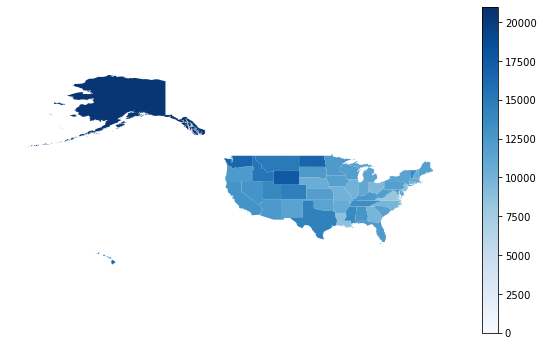

In [118]:
#plot graph based on variable
variable='price'
vmin = 0
vmax = math.ceil(merged_map_info[variable].max()/1000)*1000
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged_map_info.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, norm=plt.Normalize(vmin=vmin, vmax=vmax))